In [ ]:
!wget https://shorturl.at/BLXZ5 -O spam.csv

In [ ]:
import pandas as pd
df= pd.read_csv("/content/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df.Message # 1D
y = df.Category #1D

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, random_state=40, test_size=0.2)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

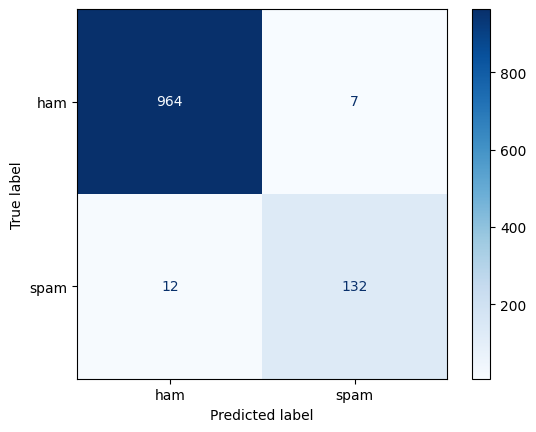

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,cmap = 'Blues')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9829596412556054

In [ ]:
import pickle

In [ ]:
with open('spam_classifier.pickle', 'wb') as file:
  pickle.dump(pipeline, file)